<a href="https://colab.research.google.com/github/Paolatae2505/Practicas-AA/blob/master/Practica07_AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practica 07
Vargas Bravo Paola

Ejercicio 1

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
dataset = pd.read_csv('wine.csv')

dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


                               alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   
target                       -0.328222    0.437776 -0.049643   

                              alcalinit

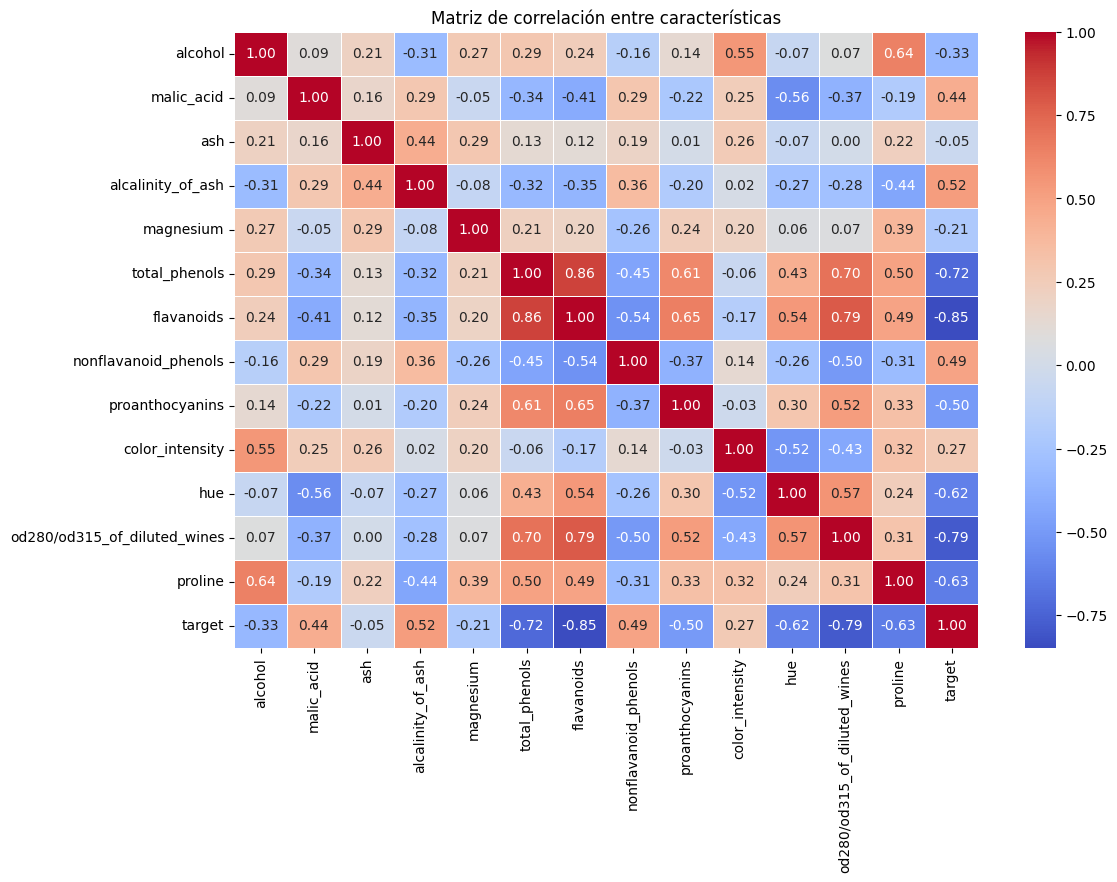

In [52]:
# Calcular la matriz de correlación
correlation_matrix = dataset.corr()
print(correlation_matrix)
# Visualizar la matriz de correlación usando un mapa de calor de seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación entre características')
plt.show()

\begin{array}{cccccc}
\hline
& \text{ash} & \text{alcalinity_of_ash} & \text{Proanthocyanins} & \text{Magnesium} & \text{Nonflavanoid_phenols} & \text{Color_intensity} \\
\hline
\text{ash} & 1.000000 & 0.443367 & 0.009652 & 0.286587 & 0.186230 & 0.258887 \\
\text{alcalinity_of_ash} & 0.443367 & 1.000000 & -0.197327 & -0.083333 & 0.361922 & 0.018732 \\
\text{Proanthocyanins} & 0.009652 & -0.197327 & 1.000000 & 0.236441 & -0.365845 & -0.025250 \\
\text{Magnesium} & 0.286587 & -0.083333 & 0.236441 & 1.000000 & -0.256294 & 0.199950 \\
\text{Nonflavanoid_phenols} & 0.186230 & 0.361922 & -0.365845 & -0.256294 & 1.000000 & 0.139057 \\
\text{Color_intensity} & 0.258887 & 0.018732 & -0.025250 & 0.199950 & 0.139057 & 1.000000 \\
\hline
\end{array}

Al examinar la matriz de correlación entre las variables seleccionadas, podemos observar que ninguna de ellas presenta una correlación extremadamente alta con las otras. Lo que como sabemos nos sugiere que hay una menor multicolinealidad entre las características. Por lo tanto, al elegir estas variables para nuestro análisis, podemos evitar problemas significativos asociados con la multicolinealidad.

Además, al seleccionar estas variables, estamos capturando una variedad de aspectos importantes de la composición y las propiedades del vino. Esto nos proporciona una base sólida para realizar un análisis de clustering, ya que estas características pueden ser relevantes para diferenciar entre distintos tipos de vino.

In [75]:
X = dataset.iloc[:, [3,4,5,8,9,10]].values
X

array([[ 15.6 , 127.  ,   2.8 ,   2.29,   5.64,   1.04],
       [ 11.2 , 100.  ,   2.65,   1.28,   4.38,   1.05],
       [ 18.6 , 101.  ,   2.8 ,   2.81,   5.68,   1.03],
       ...,
       [ 20.  , 120.  ,   1.59,   1.35,  10.2 ,   0.59],
       [ 20.  , 120.  ,   1.65,   1.46,   9.3 ,   0.6 ],
       [ 24.5 ,  96.  ,   2.05,   1.35,   9.2 ,   0.61]])

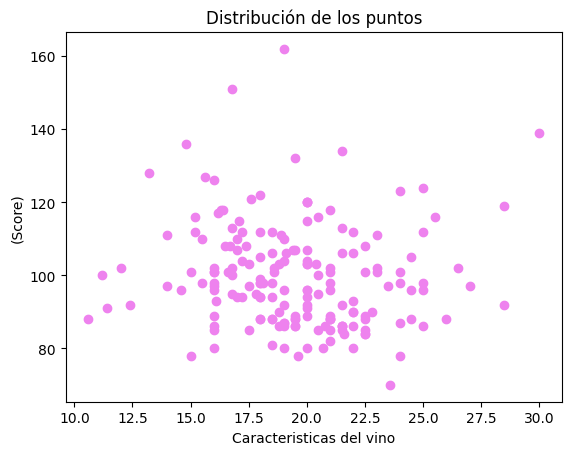

In [76]:
plt.scatter(X[:, 0], X[:, 1], color='violet')
plt.xlabel('Caracteristicas del vino')
plt.ylabel('(Score)')
plt.title('Distribución de los puntos')
plt.show()

In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

wcss = []
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

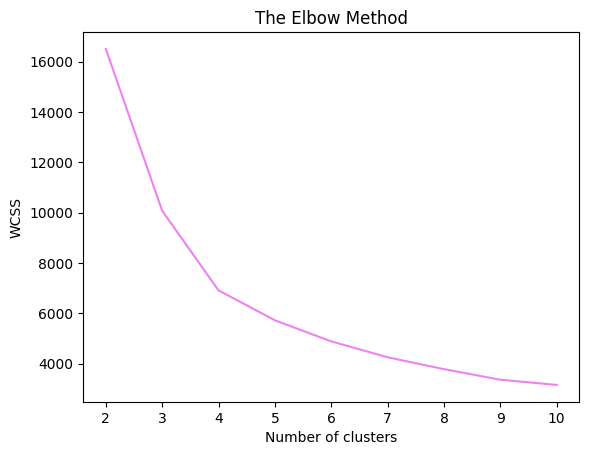

In [78]:
plt.plot(range(2, 11), wcss, color='violet')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #WCSS o SSE
plt.show()

In [79]:
print(wcss)

[16502.237920562744, 10071.763376308796, 6909.544416262389, 5720.599024388878, 4882.777250255067, 4250.826084496475, 3779.1529088294274, 3359.622477803402, 3152.9529700480134]


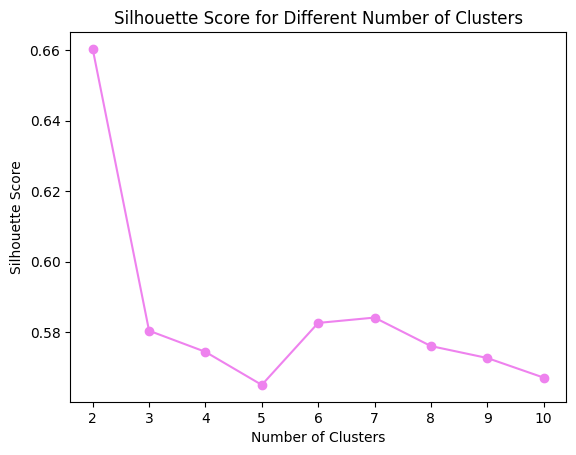

In [57]:
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='violet')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [80]:
print(silhouette_scores)

[0.5162034476273205, 0.4424340430423725, 0.4398630592177975, 0.3563841138350337, 0.35523173041567263, 0.33738149413722684, 0.3213431219245569, 0.32507682327442844, 0.3169281260807949]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


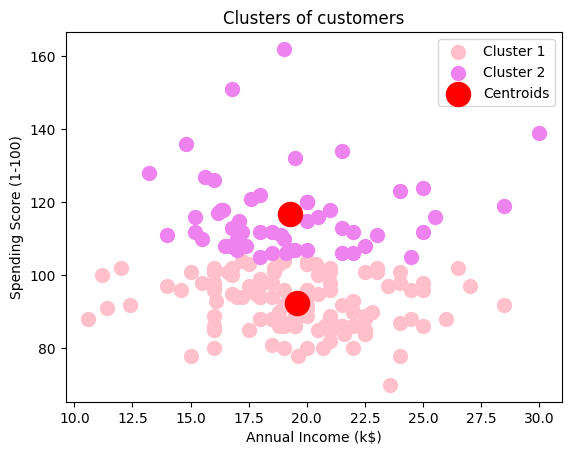

In [81]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'violet', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


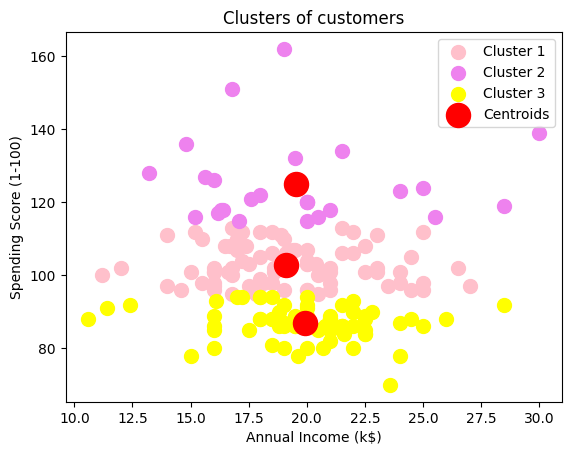

In [82]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'violet', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


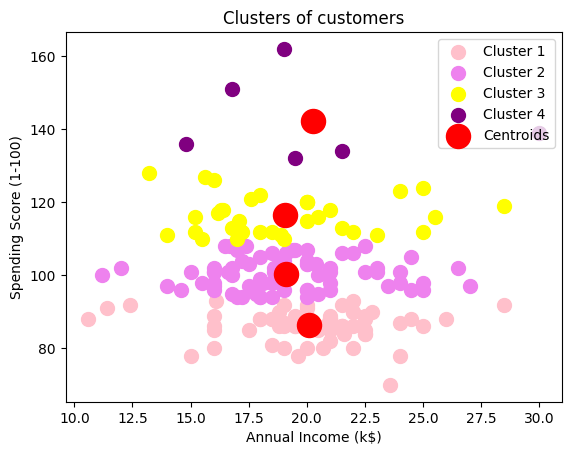

In [74]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'violet', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'purple', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Ejercicio 2

In [9]:
dataset_2 = pd.read_csv('clusters.csv')

dataset_2

,x,y
0,0.816729,1.327191
1,0.286716,1.304853
2,2.087953,0.025302
3,0.418027,1.034951
4,1.230035,-0.127041
...,...,...
3245,4.343430,6.717349
3246,-4.310424,5.162806
3247,4.669646,7.294812
3248,-3.898566,1.252578


In [10]:
X_2 = dataset_2.iloc[:, [0, 1]].values
X_2

array([[ 0.81672911,  1.32719052],
       [ 0.28671649,  1.30485269],
       [ 2.08795325,  0.02530197],
       ...,
       [ 4.66964574,  7.29481155],
       [-3.89856601,  1.25257774],
       [-2.38077677,  6.56210651]])

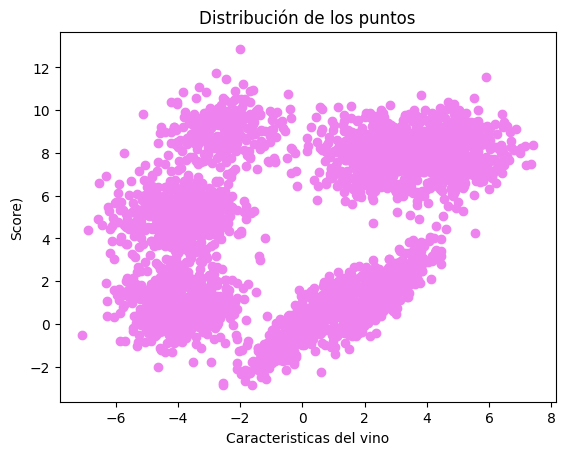

In [11]:
plt.scatter(X_2[:, 0], X_2[:, 1], color='violet')
plt.xlabel('Caracteristicas del vino')
plt.ylabel('Score)')
plt.title('Distribución de los puntos')
plt.show()

K-Means

In [12]:
wcss = []
silhouette_scores = []
davies_bouldin_scores = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_2)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_2, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    davies_bouldin_avg = davies_bouldin_score(X_2, kmeans.labels_)
    davies_bouldin_scores.append(davies_bouldin_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

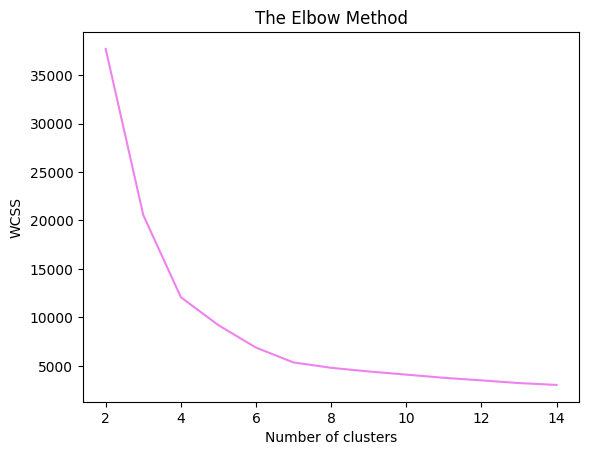

In [13]:
plt.plot(range(2, 15), wcss, color='violet')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #WCSS o SSE
plt.show()

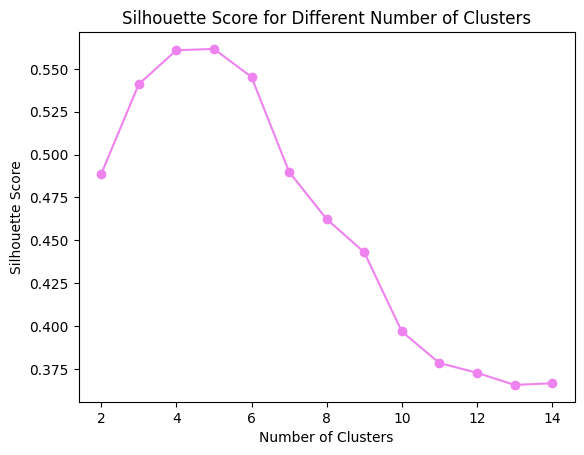

In [14]:
plt.plot(range(2, 15), silhouette_scores, marker='o', linestyle='-', color='violet')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

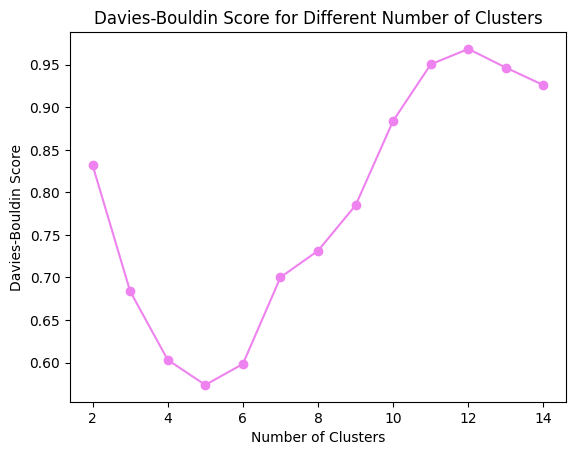

In [15]:
plt.plot(range(2, 15), davies_bouldin_scores, marker='o', linestyle='-', color='violet')
plt.title('Davies-Bouldin Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


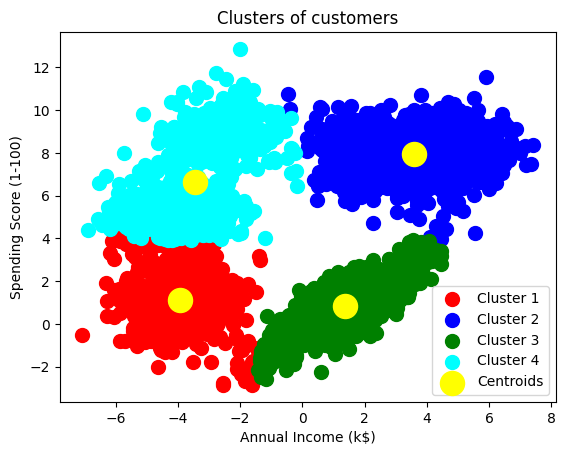

In [16]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_2)
plt.scatter(X_2[y_kmeans == 0, 0], X_2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_2[y_kmeans == 1, 0], X_2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_2[y_kmeans == 2, 0], X_2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_2[y_kmeans == 3, 0], X_2[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


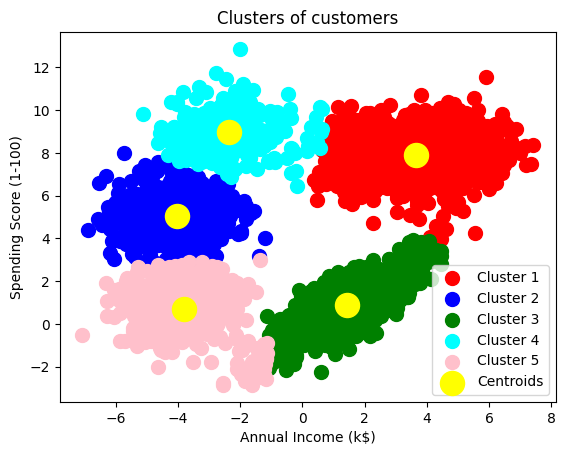

In [17]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_2)
plt.scatter(X_2[y_kmeans == 0, 0], X_2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_2[y_kmeans == 1, 0], X_2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_2[y_kmeans == 2, 0], X_2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_2[y_kmeans == 3, 0], X_2[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_2[y_kmeans == 4, 0], X_2[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


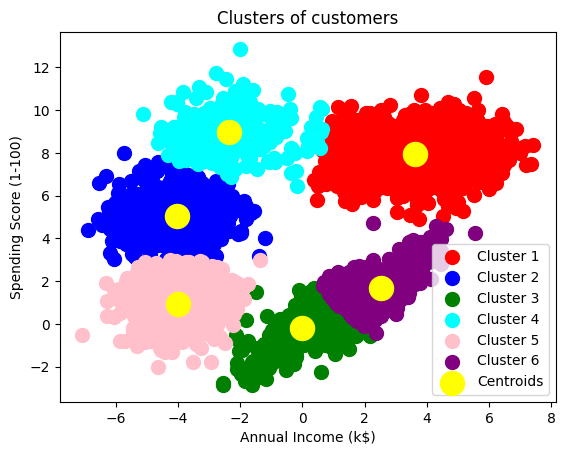

In [18]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_2)
plt.scatter(X_2[y_kmeans == 0, 0], X_2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_2[y_kmeans == 1, 0], X_2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_2[y_kmeans == 2, 0], X_2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_2[y_kmeans == 3, 0], X_2[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_2[y_kmeans == 4, 0], X_2[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')
plt.scatter(X_2[y_kmeans == 5, 0], X_2[y_kmeans == 5, 1], s = 100, c = 'purple', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Clustering Jerarquico

In [19]:
from sklearn.cluster import AgglomerativeClustering
silhouette_scores = []
davies_bouldin_scores = []

# Para el rango de clusters de 2 a 14
for i in range(2, 15):
    # Inicializar el modelo de clustering jerárquico
    agg_clustering = AgglomerativeClustering(n_clusters=i,affinity = 'euclidean', linkage = 'ward')

    # Ajustar el modelo a los datos
    agg_clustering.fit(X_2)

    # Calcular el silhouette score y añadirlo a la lista
    silhouette_avg = silhouette_score(X_2, agg_clustering.labels_)
    silhouette_scores.append(silhouette_avg)

    # Calcular el Davies-Bouldin score y añadirlo a la lista
    davies_bouldin_avg = davies_bouldin_score(X_2, agg_clustering.labels_)
    davies_bouldin_scores.append(davies_bouldin_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

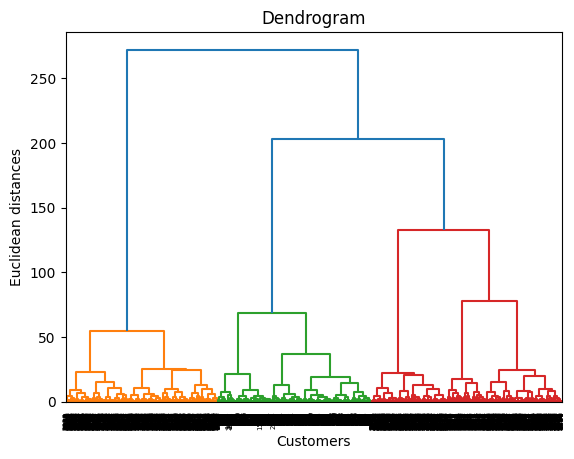

In [20]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_2, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

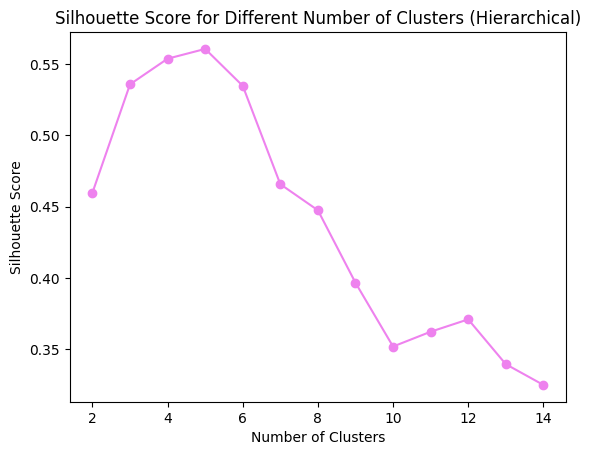

In [21]:
# Graficar el silhouette score
plt.plot(range(2, 15), silhouette_scores, marker='o', linestyle='-', color='violet')
plt.title('Silhouette Score for Different Number of Clusters (Hierarchical)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

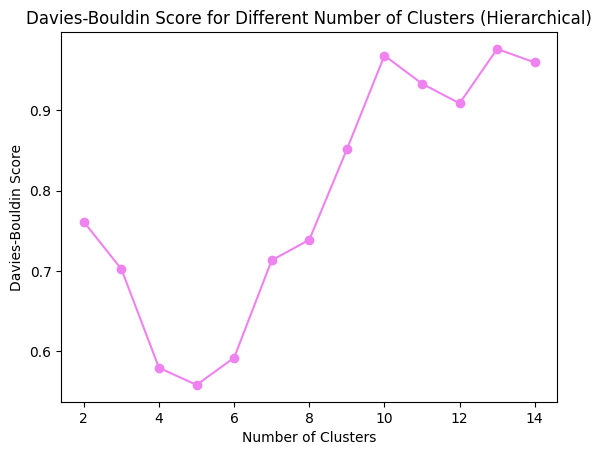

In [22]:
# Graficar el Davies-Bouldin score
plt.plot(range(2, 15), davies_bouldin_scores, marker='o', linestyle='-', color='violet')
plt.title('Davies-Bouldin Score for Different Number of Clusters (Hierarchical)')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()

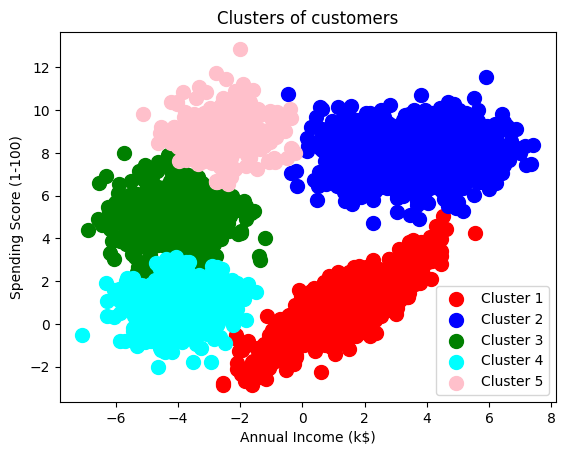

In [23]:
agg_clustering = AgglomerativeClustering(n_clusters=5)
y_agg = agg_clustering.fit_predict(X_2)
plt.scatter(X_2[y_agg == 0, 0], X_2[y_agg == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_2[y_agg == 1, 0], X_2[y_agg == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_2[y_agg == 2, 0], X_2[y_agg == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_2[y_agg == 3, 0], X_2[y_agg == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_2[y_agg == 4, 0], X_2[y_agg == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


Gaussian Mixture

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Función para trazar los clusters
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

# Función para trazar los centroides
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

# Función para trazar el modelo de mezcla gaussiana
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [25]:
# Prueba diferentes números de componentes para GaussianMixture y registra BIC, AIC y la silueta
n_components_range = range(2, 11)
bics = []
aics = []
silhouette_scores = []

for n_components in n_components_range:
    gm = GaussianMixture(n_components=n_components, n_init=10
                         , random_state=42)
    gm.fit(X_2)
    bics.append(gm.bic(X_2))
    aics.append(gm.aic(X_2))
    labels = gm.predict(X_2)
    silhouette_scores.append(silhouette_score(X_2, labels))



[32559.652081925105, 29504.639835861653, 29171.776664435416, 28882.045515242073, 28682.5742194648, 28687.088747509923, 28731.16895676573, 28774.563846247427, 28826.086901073126]
[32492.701568896544, 29401.17086118115, 29031.78922810297, 28705.539617257684, 28469.54985982847, 28437.545926221646, 28445.107673825514, 28451.984101655267, 28466.988694829022]


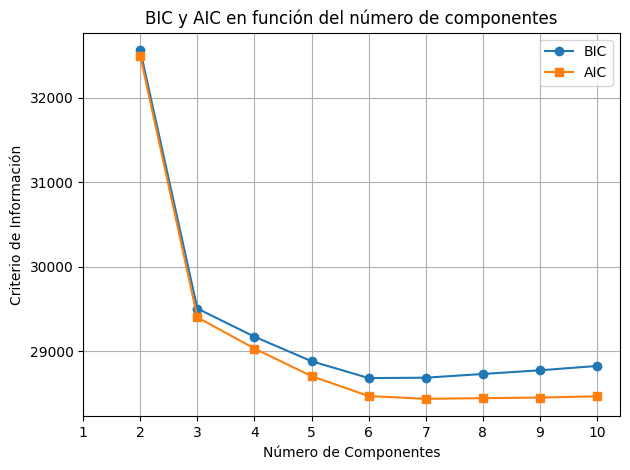

In [26]:

plt.plot(n_components_range, bics, label='BIC', marker='o')
plt.plot(n_components_range, aics, label='AIC', marker='s')
plt.xlabel('Número de Componentes')
plt.ylabel('Criterio de Información')
plt.title('BIC y AIC en función del número de componentes')
plt.xticks(np.arange(1, 11, 1))
plt.legend()
plt.grid(True)

print(bics)
print(aics)

plt.tight_layout()
plt.show()

[0.48795781245063335, 0.5370557591335244, 0.5468650623688334, 0.49956001728084826, 0.5216585623104114, 0.46452490311083533, 0.42371138130424374, 0.384579998210137, 0.37557265880700114]


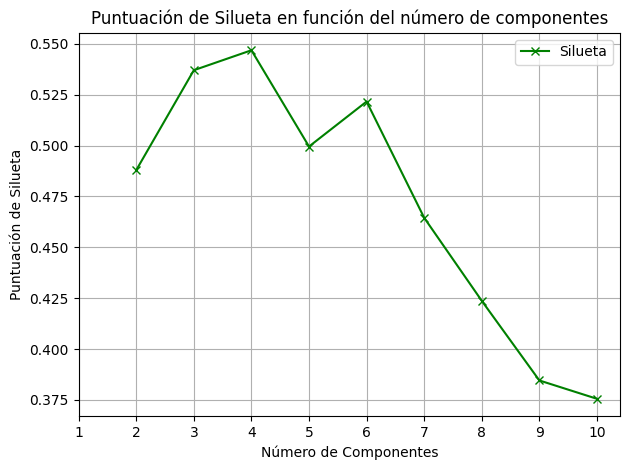

In [27]:
print(silhouette_scores)
plt.plot(n_components_range, silhouette_scores, label='Silueta', marker='x', color='g')
plt.xlabel('Número de Componentes')
plt.ylabel('Puntuación de Silueta')
plt.title('Puntuación de Silueta en función del número de componentes')
plt.xticks(np.arange(1, 11, 1))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [28]:

best_gm = GaussianMixture(n_components=6, n_init=10, random_state=42)
best_gm.fit(X_2)
plot_gaussian_mixture(best_gm, X_2)
plt.title(f'Mejor modelo con {4} componentes')
plt.grid(True)

plt.tight_layout()
plt.show()

NameError: name 'LogNorm' is not defined

In [ ]:

best_gm = GaussianMixture(n_components=4, n_init=10, random_state=42)
best_gm.fit(X_2)
plot_gaussian_mixture(best_gm, X_2)
plt.title(f'Mejor modelo con {4} componentes')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=6, n_init=10, random_state=42)
gm.fit(X_2)

gm.n_iter_

In [ ]:
labels = gm.predict(X_2)

plot_clusters(X_2, labels)

In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=4, n_init=10, random_state=42)
gm.fit(X_2)

gm.n_iter_

In [ ]:
labels = gm.predict(X_2)

plot_clusters(X_2, labels)

DBSCAN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN


In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_2)
distances, indices = nbrs.kneighbors(X_2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances,color='violet')
plt.xlabel('Número de vecinos')
plt.ylabel('Distancia')
plt.title('Gráfico de distancia vs número de vecinos')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
# Prueba diferentes valores de epsilon y min_samples
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_values = [3, 4, 5, 6, 7]


silhouette_scores = []
best_eps = None
best_min_samples = None
sbest_score = -1
ch_scores = []
db_scores = []

# Iterar sobre diferentes combinaciones de hiperparámetros y calcular métricas de evaluación
for eps in epsilon_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X_2)
        labels_pred = dbscan.labels_

        silhouette = silhouette_score(X_2, labels_pred)
        ch_score = calinski_harabasz_score(X_2, labels_pred)
        db_score = davies_bouldin_score(X_2, labels_pred)

        silhouette_scores.append(silhouette)
        ch_scores.append(ch_score)
        db_scores.append(db_score)

        # Actualizar los mejores hiperparámetros si se encuentra una mejor puntuación de evaluación
        if silhouette > best_score:
            best_score = silhouette
            best_eps = eps
            best_min_samples = min_samples

In [ ]:
silhouette_scores = np.array(silhouette_scores).reshape(len(epsilon_values), len(min_samples_values))
ch_scores = np.array(ch_scores).reshape(len(epsilon_values), len(min_samples_values))
db_scores = np.array(db_scores).reshape(len(epsilon_values), len(min_samples_values))

In [ ]:
plt.figure(figsize=(10, 6))

for i, eps in enumerate(epsilon_values):
    plt.plot(min_samples_values, silhouette_scores[i], label=f'Epsilon = {eps}', marker='o')

plt.xlabel('Min_samples')
plt.ylabel('Puntuación de Silueta')
plt.title('Puntuación de Silueta en función de Epsilon y Min_samples')
plt.legend(title='Epsilon')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))

for i, eps in enumerate(epsilon_values):
    plt.plot(min_samples_values, ch_scores[i], label=f'Epsilon = {eps}', marker='o')

plt.xlabel('Min_samples')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index en función de Epsilon y Min_samples')
plt.legend(title='Epsilon')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

for i, eps in enumerate(epsilon_values):
    plt.plot(min_samples_values, db_scores[i], label=f'Epsilon = {eps}', marker='o')

plt.xlabel('Min_samples')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index en función de Epsilon y Min_samples')
plt.legend(title='Epsilon')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(f"Mejores hiperparámetros: Eps={best_eps}, Min_samples={best_min_samples}")

In [ ]:
dbscan_best = DBSCAN(eps=0.5, min_samples=5)
dbscan_best.fit(X_2)
labels_best = dbscan_best.labels_

# Visualizar los resultados del clustering
plt.scatter(X_2[:, 0], X_2[:, 1], c=labels_best, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
dbscan_best = DBSCAN(eps=0.5, min_samples=7)
dbscan_best.fit(X_2)
labels_best = dbscan_best.labels_

# Visualizar los resultados del clustering
plt.scatter(X_2[:, 0], X_2[:, 1], c=labels_best, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
dbscan_best = DBSCAN(eps=0.5, min_samples=4)
dbscan_best.fit(X_2)
labels_best = dbscan_best.labels_

# Visualizar los resultados del clustering
plt.scatter(X_2[:, 0], X_2[:, 1], c=labels_best, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

# ¿Cual es el numero  optimo de clusters para este conjunto de datos? Justifica tu respuesta.

El optimo son 5 clusters

# Compara los resultados entre los diferentes algoritmos. ¿Cual es el mejor algoritmo para clasificar este conjunto de datos?